In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from scipy.signal import find_peaks
import pims, sys
from skimage.transform import rotate
from pathlib import Path
from scipy.signal import savgol_filter
sys.path.insert(0, r'C:\\Warwick\\Jerko_Code_And_Docs\\Manuscript Code')
from Filament_Analysis.geometric_2 import SimpleSpline

<blockquote>1. Load the image series, the filament axis (or axes) and visualise.</blockquote>

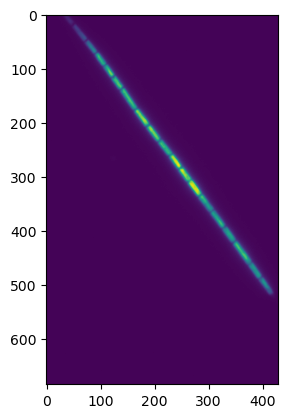

In [2]:
# Stack and file paths, here we have two stacks that will be combined later.
base_path = Path(r'C:\Users\jrosk\Dropbox\Warwick\TIRF\February_2023\22-02-2023\Untreated_Sample')

filepath_0 = base_path.joinpath(r'Slides\Slide_1\22-Feb-23_tirf-14.tif')


# This is to crop the stack, so that we only have the red channel
@pims.pipeline
def crop_image(frame):
    return frame[:,428:] # rotate(frame,90, preserve_range=True, resize=True)

full_roi_stack_0 = pims.open(filepath_0.as_posix())

# Apply pipeline
images_0 = crop_image(full_roi_stack_0)

plt.imshow(images_0[1])


In [4]:
from Image_Analysis.Filament_Analysis.various_funcs import niblack_threshold

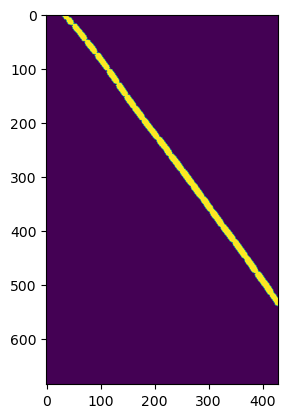

In [10]:
# approach 2
#framenums = [n for n in range(0, len(images_0)) if n%50 == 0]
framenums=[500]
avg_img = np.zeros_like(images_0[0], dtype=np.uint16)
for n in framenums:
    avg_img = avg_img + niblack_threshold(images_0[n],blob_size_thr = 1000)
#avg_img = avg_img / len(framenums)

plt.imshow(avg_img)

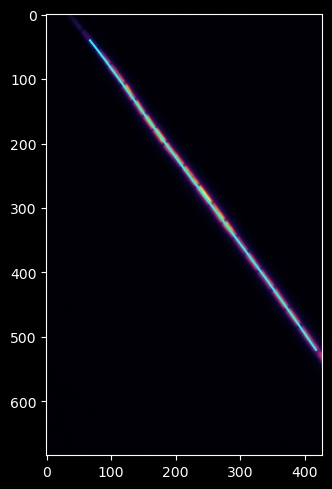

In [18]:
filament_axis = SimpleSpline.from_binary_image(dx=0.01,input_image=avg_img > 0, spline_k = 5)

#Sometimes the spline goes beyond the image dimensions and causes issues
filament_axis.crop_to_image_dimensions(images_0[0].shape)

edited_points = np.logical_and(filament_axis.xy[:,1] > 40, filament_axis.xy[:,1] < 520)
edited_points = filament_axis.xy[edited_points]
"""
dydx = np.average(filament_axis.derivative_func(edited_points[-50:-1,0]))
ext_points = filament_axis.xy[filament_axis.xy[:,0] > 475, 0]
y_ext = edited_points[-1,1] + dydx*(ext_points - edited_points[-1,0])

good_extension = np.argwhere(y_ext > 0)
extended = np.concatenate((edited_points,
                          np.column_stack((ext_points[good_extension], y_ext[good_extension]))
                          ), axis=0
                          )
 """
""" # Visualise the spline
with plt.style.context('dark_background'):
    fig , ax = plt.subplots(1,1, figsize=(8,5))

    ax.imshow(images_0[650], cmap='inferno')
    ax.plot(edited_points[:,0], edited_points[:,1])
    ax.plot(extended[:,0], extended[:,1], color='cyan')
    
    plt.tight_layout()
    plt.show() """
# Visualise the spline
with plt.style.context('dark_background'):
    fig , ax = plt.subplots(1,1, figsize=(8,5))

    ax.imshow(images_0[650], cmap='inferno')
    ax.plot(edited_points[:,0], edited_points[:,1], '-', color='cyan')

    plt.tight_layout()
    plt.show()

In [9]:
filament_axis.xy

array([], shape=(0, 2), dtype=float64)

In [21]:
#Save Splines
#axes_path = base_path.joinpath(r'FilamentAxes\Slide_1\22-Feb-23_tirf-14')

splines = [edited_points]

fnames = ['spline_NONROT.txt']

headers = ['Bottom Spline NON ROT - 14/08/23']

for k,name in enumerate(fnames):
    axes_path.mkdir(parents=True, exist_ok=True)
    np.savetxt('splines\\spline_nonrot.txt',splines[k],delimiter = ',', header = headers[k])